In [1]:
pip install gspread

In [3]:
# importing required libtaries
import gspread as gs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
%matplotlib inline

In [4]:
#establish the connection of google sheets using API 
gc = gs.service_account("investment-advisor-370204-7fec0ca70a83.json")
wks = gc.open("Copy of BSE500").sheet1
wks

<Worksheet 'bse500' id:1547461811>

In [5]:
#Opening Gsheet1 in the form of dataframe in pandas 
sheet_name = 'Copy of BSE500'
tab_name = 'bse500'
def get_sheet_data(sheet_name,tab_name):
    gc = gs.service_account(filename="investment-advisor-370204-7fec0ca70a83.json")
    sh = gc.open(sheet_name)
    worksheet=sh.worksheet(tab_name)
    df=pd.DataFrame(worksheet.get_all_records())
    return df

df = get_sheet_data(sheet_name,tab_name)
df

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Price earnings to growth,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,0.49,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,3.63,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,13.56,1.13,52.71,12.1,53.17,177.37,227.22,265.9,270.47,315.0
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.81,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.0
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,-5.8,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,3.85,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.0
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,,0.00,20.5,1.18,8.48,-20.7,260.73,28.68,8.54,0.0
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,15.58,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.0
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.0


In [47]:
df.dtypes

Company                      object
BSE code                      int64
NSE code                     object
ISIN                         object
Sector                       object
Industry                     object
Date                         object
Price                       float64
1 day change(%)             float64
52 Week Low                 float64
52 Week High                float64
3 Year Low                   object
3 Year High                  object
5 Year Low                   object
5 Year High                  object
All Time Low                float64
All Time High               float64
Market Cap(Cr)              float64
Enterprise Value(Cr)         object
1-Week Return               float64
1-Month Return              float64
3-Month Return(%)           float64
1-Year Return(%)             object
3-Year Return                object
5-Year Return(%)             object
10-Year Return(%)            object
Price to Earnings            object
Median P/E                  

In [48]:
df.columns

Index(['Company', 'BSE code', 'NSE code', 'ISIN', 'Sector', 'Industry', 'Date',
       'Price', '1 day change(%)', '52 Week Low', '52 Week High', '3 Year Low',
       '3 Year High', '5 Year Low', '5 Year High', 'All Time Low',
       'All Time High', 'Market Cap(Cr)', 'Enterprise Value(Cr)',
       '1-Week Return', '1-Month Return', '3-Month Return(%)',
       '1-Year Return(%)', '3-Year Return', '5-Year Return(%)',
       '10-Year Return(%)', 'Price to Earnings', 'Median P/E', 'Price to Book',
       'Median P/B', 'Earning Yield(%)', 'Price earnings to growth',
       'Dividend Yield(%)', 'EV / EBITDA', 'Price / Sales',
       'Price / Cash Flow', 'Earning Per Share', 'Book Value Per Share',
       'Cash Flow Per Share', 'Free Cash Flow Per Share', 'Dividend Per Share',
       'Delta'],
      dtype='object')

In [102]:
# Changing Datatype of required column to float to carry out operations
for i in df.columns:
    df[i]=pd.to_numeric(df[i],errors="ignore")

In [103]:

df.dtypes

Company                      object
BSE code                      int64
NSE code                     object
ISIN                         object
Sector                       object
Industry                     object
Date                         object
Price                       float64
1 day change(%)             float64
52 Week Low                 float64
52 Week High                float64
3 Year Low                  float64
3 Year High                 float64
5 Year Low                  float64
5 Year High                 float64
All Time Low                float64
All Time High               float64
Market Cap(Cr)              float64
Enterprise Value(Cr)        float64
1-Week Return               float64
1-Month Return              float64
3-Month Return(%)           float64
1-Year Return(%)            float64
3-Year Return               float64
5-Year Return(%)            float64
10-Year Return(%)           float64
Price to Earnings           float64
Median P/E                  

In [51]:
df


,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0,0.279073
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0,0.033278
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,1.13,52.71,12.10,53.17,177.37,227.22,265.90,270.47,315.0,0.142153
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.51,30.98,7.73,40.84,380.52,1403.00,445.96,446.90,275.0,0.239214
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0,0.086177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.0,0.049009
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,0.00,20.50,1.18,8.48,-20.70,260.73,28.68,8.54,0.0,0.506757
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.0,0.069832
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.0,0.647250


In [52]:
df.shape


(501, 42)

In [53]:
df.columns

Index(['Company', 'BSE code', 'NSE code', 'ISIN', 'Sector', 'Industry', 'Date',
       'Price', '1 day change(%)', '52 Week Low', '52 Week High', '3 Year Low',
       '3 Year High', '5 Year Low', '5 Year High', 'All Time Low',
       'All Time High', 'Market Cap(Cr)', 'Enterprise Value(Cr)',
       '1-Week Return', '1-Month Return', '3-Month Return(%)',
       '1-Year Return(%)', '3-Year Return', '5-Year Return(%)',
       '10-Year Return(%)', 'Price to Earnings', 'Median P/E', 'Price to Book',
       'Median P/B', 'Earning Yield(%)', 'Price earnings to growth',
       'Dividend Yield(%)', 'EV / EBITDA', 'Price / Sales',
       'Price / Cash Flow', 'Earning Per Share', 'Book Value Per Share',
       'Cash Flow Per Share', 'Free Cash Flow Per Share', 'Dividend Per Share',
       'Delta'],
      dtype='object')

In [54]:
# Opening Ghseet 2 
sheet_name = 'Copy of Income / Expense'
tab_name = 'inex'
def get_sheet_data(sheet_name,tab_name):
    gc = gs.service_account(filename="investment-advisor-370204-7fec0ca70a83.json")
    sh = gc.open(sheet_name)
    worksheet=sh.worksheet(tab_name)
    df=pd.DataFrame(worksheet.get_all_values())
    return df

df1 = get_sheet_data(sheet_name,tab_name)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,,,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50,Expense,,50,INR,50,,,
2,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300,Expense,,300,INR,300,,,
3,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78,Expense,,78,INR,78,,,
4,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30,Expense,,30,INR,30,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90,Expense,,90,INR,90,,,
274,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97,Expense,,97,INR,97,,,
275,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130,Expense,,130,INR,130,,,
276,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875,Expense,,875,INR,875,,,


In [55]:
df1.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
dtype: object

In [56]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,,,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50,Expense,,50,INR,50,,,
2,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300,Expense,,300,INR,300,,,
3,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78,Expense,,78,INR,78,,,
4,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30,Expense,,30,INR,30,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90,Expense,,90,INR,90,,,
274,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97,Expense,,97,INR,97,,,
275,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130,Expense,,130,INR,130,,,
276,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875,Expense,,875,INR,875,,,


In [57]:
# Changing Datatype to Float
for i in df1.columns:
    df1[i]=pd.to_numeric(df1[i],errors='ignore')

In [58]:
df1.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11    float64
12    float64
13     object
dtype: object

In [59]:
df2 = df1

In [60]:
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,NaN,NaN,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50,Expense,,50,INR,50,NaN,NaN,


In [61]:
#Making Title name/Header as column name
df2.columns=df2.iloc[0]
df2=df2[1:]
df2

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,NaN,NaN,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50,Expense,,50,INR,50,NaN,NaN,
2,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300,Expense,,300,INR,300,NaN,NaN,
3,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78,Expense,,78,INR,78,NaN,NaN,
4,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30,Expense,,30,INR,30,NaN,NaN,
5,3/1/2022 18:22,CUB - online payment,Food,,Snacks,67,Expense,,67,INR,67,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90,Expense,,90,INR,90,NaN,NaN,
274,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97,Expense,,97,INR,97,NaN,NaN,
275,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130,Expense,,130,INR,130,NaN,NaN,
276,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875,Expense,,875,INR,875,NaN,NaN,


In [62]:
#changing Datatype required column
df2["INR"]=df2["INR"].astype(float)

C:\Users\Prashant\AppData\Local\Temp\ipykernel_5524\2945420014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["INR"]=df2["INR"].astype(float)


In [63]:
df2

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,NaN,NaN,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50.0,Expense,,50,INR,50,NaN,NaN,
2,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300.0,Expense,,300,INR,300,NaN,NaN,
3,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78.0,Expense,,78,INR,78,NaN,NaN,
4,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30.0,Expense,,30,INR,30,NaN,NaN,
5,3/1/2022 18:22,CUB - online payment,Food,,Snacks,67.0,Expense,,67,INR,67,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90.0,Expense,,90,INR,90,NaN,NaN,
274,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97.0,Expense,,97,INR,97,NaN,NaN,
275,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130.0,Expense,,130,INR,130,NaN,NaN,
276,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875.0,Expense,,875,INR,875,NaN,NaN,


In [64]:
df2.shape

(277, 14)

In [65]:
df2

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note,Amount,Currency,Account,NaN,NaN,
1,3/2/2022 10:11,CUB - online payment,Food,,Brownie,50.0,Expense,,50,INR,50,NaN,NaN,
2,3/2/2022 10:11,CUB - online payment,Other,,To lended people,300.0,Expense,,300,INR,300,NaN,NaN,
3,3/1/2022 19:50,CUB - online payment,Food,,Dinner,78.0,Expense,,78,INR,78,NaN,NaN,
4,3/1/2022 18:56,CUB - online payment,Transportation,,Metro,30.0,Expense,,30,INR,30,NaN,NaN,
5,3/1/2022 18:22,CUB - online payment,Food,,Snacks,67.0,Expense,,67,INR,67,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,11/22/2021 14:16,CUB - online payment,Food,,Dinner,90.0,Expense,,90,INR,90,NaN,NaN,
274,11/22/2021 14:16,CUB - online payment,Food,,Lunch with company,97.0,Expense,,97,INR,97,NaN,NaN,
275,11/21/2021 17:07,CUB - online payment,Transportation,,Rapido,130.0,Expense,,130,INR,130,NaN,NaN,
276,11/21/2021 15:50,CUB - online payment,Food,,Lunch,875.0,Expense,,875,INR,875,NaN,NaN,


In [66]:
df2.dtypes

0
Date               object
Account            object
Category           object
Subcategory        object
Note               object
INR               float64
Income/Expense     object
Note               object
Amount             object
Currency           object
Account            object
NaN               float64
NaN               float64
                   object
dtype: object

In [67]:
# SubTask - 1
# Populating Net Income

Net_income = df2[df2["Income/Expense"]=="Income"]["INR"].sum()
Net_income

54754.0

In [68]:
# Populating Net Expense

Net_expense = df2[df2["Income/Expense"]=="Expense"]["INR"].sum()
Net_expense

59024.0

In [69]:
# Populating Available_for_investment 

Available_for_investment = Net_income - Net_expense
Available_for_investment

-4270.0

In [70]:
# Calculating COst incurred into different categories 

In [71]:
#Food
Food = df2[df2['Category']=='Food']["INR"].sum()
Food

24502.48

In [72]:
#Other
Other = df2[df2['Category']=='Other']["INR"].sum()
Other

37868.0

In [73]:
#Transportation
Transportation = df2[df2['Category']=='Transportation']["INR"].sum()
Transportation

9203.8

In [74]:
#Social Life
Social_Life = df2[df2['Category']=='Social Life']["INR"].sum()
Social_Life

2513.7200000000003

In [75]:
#Household
Household = df2[df2['Category']=='Household']["INR"].sum()
Household

12188.0

In [76]:
#Apparel
Apparel = df2[df2['Category']=='Apparel']["INR"].sum()
Apparel

3388.0

In [77]:
# Education
Education = df2[df2['Category']=='Education']["INR"].sum()
Education

1400.0

In [78]:
#Salary
Salary = df2[df2['Category']=='Salary']["INR"].sum()
Salary

8000.0

In [79]:
# Allowance
Allowance = df2[df2['Category']=='Allowance']["INR"].sum()
Allowance

14000.0

In [80]:
# Beauty
Beauty = df2[df2['Category']=='Beauty']["INR"].sum()
Beauty

196.0

In [81]:
#Gift
Gift = df2[df2['Category']=='Gift']["INR"].sum()
Gift

115.0

In [82]:
#Petty Cash
Petty_Cash = df2[df2['Category']=='Petty cash']["INR"].sum()
Petty_Cash

3.0

In [83]:
# Updating Above Data in Final report sheet - Gsheet 3
gsheet_name = 'Copy of Final Report'
tab_name = 'Sheet1'
def write_data(gsheet_name,tab_name):
    gc = gs.service_account(filename="investment-advisor-370204-7fec0ca70a83.json")
    sh = gc.open(gsheet_name)
    worksheet = sh.worksheet(tab_name)
    worksheet.update('C7',Net_income)
    worksheet.update('C8',Net_expense)
    worksheet.update('C10',Food)
    worksheet.update('C11',Other)
    worksheet.update('C12',Transportation)
    worksheet.update('C13',Social_Life)
    worksheet.update('C14',Household)
    worksheet.update('C15',Apparel)
    worksheet.update('C16',Education)
    worksheet.update('C17',Salary)
    worksheet.update('C18',Allowance)
    worksheet.update('C19',Beauty)
    worksheet.update('C20',Gift)
    worksheet.update('C21',Petty_Cash)
    
    worksheet.update('C24',Available_for_investment)
    
    
    

write_data(gsheet_name,tab_name)

In [84]:
#Subtask 2
#Opening Gsheet1 in the form of dataframe in pandas 
sheet_name = 'Copy of BSE500'
tab_name = 'bse500'
def get_sheet_data(sheet_name,tab_name):
    gc = gs.service_account(filename="investment-advisor-370204-7fec0ca70a83.json")
    sh = gc.open(sheet_name)
    worksheet=sh.worksheet(tab_name)
    df=pd.DataFrame(worksheet.get_all_records())
    return df

df = get_sheet_data(sheet_name,tab_name)
df

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Price earnings to growth,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,0.49,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,3.63,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,13.56,1.13,52.71,12.1,53.17,177.37,227.22,265.9,270.47,315.0
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.81,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.0
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,-5.8,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,3.85,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.0
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,,0.00,20.5,1.18,8.48,-20.7,260.73,28.68,8.54,0.0
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,15.58,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.0
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.0


In [85]:
df

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Price earnings to growth,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share
0,Sanofi India Ltd.,500674,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.59,6086.30,...,0.49,7.95,16.68,4.98,25.39,425.09,631.65,242.96,459.22,490.0
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,3.63,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0
2,Procter & Gamble Hygiene & Health Care Ltd.,500459,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.24,12801.00,...,13.56,1.13,52.71,12.1,53.17,177.37,227.22,265.9,270.47,315.0
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.81,1.51,30.98,7.73,40.84,380.52,1403.0,445.96,446.9,275.0
4,Bosch Ltd.,500530,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.13,12932.45,...,-5.8,1.19,25.04,4.03,192.66,438.11,3734.33,91.29,46.68,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Westlife Development Ltd.,505533,WESTLIFE,INE274F01020,Services,Restaurants,2022-09-05,650.05,0.82,402.30,...,3.85,0.00,34.06,7.81,59.43,3.55,30.99,10.94,1.29,0.0
497,Wockhardt Ltd.,532300,WOCKPHARMA,INE049B01025,Healthcare,Drugs & Pharma,2022-09-05,242.70,3.01,201.50,...,,0.00,20.5,1.18,8.48,-20.7,260.73,28.68,8.54,0.0
498,Yes Bank Ltd.,532648,YESBANK,INE528G01035,Financial,Banking,2022-09-05,16.65,2.78,10.80,...,15.58,0.00,23.87,2.13,1.77,0.47,13.61,9.42,7.86,0.0
499,Zomato Ltd.,543320,ZOMATO,INE758T01015,Services,E-Commerce,2022-09-05,59.65,-0.17,40.60,...,,0.00,-40.17,10.71,-73.58,-1.21,23.01,-0.91,-1.16,0.0


In [99]:
# inserting delta column

df['Delta']=(df['52 Week High']-df['Price'])/df['52 Week High']

In [104]:
#1 high risk taking companies
high_risk_company = df[(df['Delta']>0) & (df['Market Cap(Cr)']<2000) & (df['10-Year Return(%)']<8)]
high_risk_company

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta


In [105]:
# Assigning Values that got in high risk companies to variables 
# Variables For Companies
A = "No Company"
B = "No Company"
C = "No Company"
D = "No Company"
E = "No Company"
a=' '
b=' '
if Available_for_investment>0:
    high_risk_amount = Available_for_investment/len(high_risk_company.index)
else:
    high_risk_amount = 0

# Variables for Amounts
AA = high_risk_amount
BB = high_risk_amount
CC = high_risk_amount
DD = high_risk_amount
EE = high_risk_amount
aa =' '
bb =' '

In [106]:
#2 risk taking
risk_taking_company = df[(df['Delta']>0) & (df['Market Cap(Cr)'].between(2000,5000)) & (df['10-Year Return(%)'].between(8,15))].sort_values(['Dividend Per Share'],ascending = False)
risk_taking_company

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
320,NCC Ltd.,500294,NCC,INE868B01028,Construction,Construction,2022-09-05,74.20,-0.13,52.20,...,2.70,4.44,0.38,3.29,8.95,92.65,23.21,15.82,2.0,0.152000
325,Tata Coffee Ltd.,532301,TATACOFFEE,INE493A01027,Consumer Staples,Tea & Coffee,2022-09-05,243.10,-0.57,181.65,...,0.82,11.41,1.82,31.66,8.79,84.80,7.67,2.44,2.0,0.044418
396,Greaves Cotton Ltd.,501455,GREAVESCOT,INE224A01026,Capital Goods,Diesel Engines,2022-09-05,175.10,0.29,129.05,...,0.11,34.08,1.89,-64.59,0.14,32.92,-2.71,-5.35,0.2,0.323677
430,FDC Ltd.,531599,FDC,INE258B01022,Healthcare,Drugs & Pharma,2022-09-05,280.25,2.43,225.00,...,0.00,13.88,2.94,28.68,11.41,122.18,9.58,5.88,0.0,0.246640


In [107]:
# Assigning Values that got in  risk companies to variables 
# Variables For Companies
F = 'NCC Ltd.'
G = 'Tata Coffee Ltd'
H = 'Greaves Cotton Ltd.'
I = 'FDC Ltd.'
J = ' '
f=' '
g=' '
if Available_for_investment>0:
    risk_amount = Available_for_investment/len(risk_taking_company.index)
else:
    risk_amount = 0
# Variables for Amounts
FF = risk_amount
GG = risk_amount
HH = risk_amount
II = risk_amount
JJ = ' '
ff=' '
gg=' '

In [108]:
#3 Moderate risk taking
Moderate_risk_company = df[(df['Delta']>0) & (df['Market Cap(Cr)'].between(5000,15000)) & (df['10-Year Return(%)'].between(15,20))].sort_values(['Dividend Per Share']
                                                                                                                 ,ascending = False).head(5)
Moderate_risk_company 

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
64,Cyient Ltd.,532175,CYIENT,INE136B01020,Technology,Software,2022-09-05,835.20,0.08,720.0,...,2.87,8.65,1.95,14.54,47.38,290.52,57.47,50.05,24.0,0.353560
129,Birla Corporation Ltd.,500335,BIRLACORPN,INE340A01012,Materials,Cement,2022-09-05,1005.05,3.74,823.0,...,1.00,9.62,0.98,5.83,41.43,793.55,172.50,23.02,10.0,0.390879
131,Graphite India Ltd.,509488,GRAPHITE,INE371A01025,Capital Goods,Refractories,2022-09-05,408.45,0.53,350.0,...,2.45,10.80,2.43,-16.32,19.40,254.42,-25.03,-11.36,10.0,0.382073
151,Symphony Ltd.,517385,SYMPHONY,INE225D01027,Consumer Discretionary,ACs & Refrigerators,2022-09-05,925.25,-0.81,828.0,...,0.97,27.78,5.69,113.88,20.44,124.14,8.13,8.51,9.0,0.238477
163,Chambal Fertilisers & Chemicals Ltd.,500085,CHAMBLFERT,INE085A01013,Chemicals,Nitrogenous Fertilizer.,2022-09-05,345.65,-0.04,260.8,...,2.17,7.72,0.73,-593.74,36.67,161.25,-0.58,-16.73,7.5,0.330136


In [109]:
# Assigning Values that got in Moderate risk companies to variables 
# Variables For Companies
K = 'Cyient Ltd.'
L = 'Birla Corporation Ltd.'
M = 'Graphite India Ltd.'
N = 'Symphony Ltd.'
O = 'Chambal Fertilisers & Chemicals Ltd.'
k=' '
l=' '

if Available_for_investment>0:
    Moderate_risk_amount = Available_for_investment/len(Moderate_risk_company.index)
else:
    Moderate_risk_amount = 0

# Variables for Amounts

KK = Moderate_risk_amount
LL = Moderate_risk_amount
MM = Moderate_risk_amount
NN= Moderate_risk_amount
OO= Moderate_risk_amount
kk=' '
ll=' '

In [110]:
# 4 low risk taking

low_risk_company = df[(df['Delta']>0) & (df['Market Cap(Cr)']>15000) & (df['10-Year Return(%)']>20)].sort_values(['Dividend Per Share'],
                                                                                              ascending = False).head()
low_risk_company

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
1,Page Industries Ltd.,532827,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.26,31500.00,...,0.74,51.79,11.75,169.84,656.83,1161.63,293.09,191.03,370.0,0.033278
3,Abbott India Ltd.,500488,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.26,15514.00,...,1.51,30.98,7.73,40.84,380.52,1403.00,445.96,446.90,275.0,0.239214
8,MRF Ltd.,500290,MRF,INE883A01011,Automobile,Tyres & Tubes,2022-09-05,84254.05,-0.12,63000.00,...,0.18,15.57,1.72,-61.82,1478.99,33376.26,-1363.28,-5522.36,150.0,0.058613
13,Bajaj Holdings & Investment Ltd.,500490,BAJAJHLDNG,INE118A01012,Financial,Investment Services,2022-09-05,5672.75,0.40,4231.25,...,2.03,176.36,163.59,39.22,381.55,3853.51,144.64,29.02,115.0,0.140232
16,Honeywell Automation India Ltd.,517174,HONAUT,INE671A01010,Capital Goods,Electronic Components,2022-09-05,41954.05,-0.59,30185.35,...,0.21,66.82,12.14,140.56,395.37,3313.31,298.17,384.59,90.0,0.114893


In [111]:
# Assigning Values that got in Low risk companies to variables 
# Variables For Companies
P = 'Page Industries Ltd.'
Q = 'Abbott India Ltd.'
R = 'MRF Ltd.'
S = 'Bajaj Holdings & Investment Ltd.'
T = 'Honeywell Automation India Ltd.'
p=' '
q=' '

if Available_for_investment>0:
    low_risk_amount = Available_for_investment/len(low_risk_company.index)
else:
    low_risk_amount = 0

# Variables for Amounts

PP = low_risk_amount
QQ = low_risk_amount
RR = low_risk_amount
SS = low_risk_amount
TT = low_risk_amount
pp=' '
qq=' '

In [112]:
# Updating Above Data in  Final report google sheet google sheets
gc = gs.service_account(filename="investment-advisor-370204-7fec0ca70a83.json")
sh = gc.open('Copy of Final Report')
worksheet1=sh.worksheet("Sheet1")
worksheet2=sh.worksheet("Sheet2")

C27= worksheet1.acell('C27').value
C27
if C27=='High Risk Taking':
    cell_list = worksheet2.range('B2:B8')
    cell_values = [A,B,C,D,E,a,b]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val
    

    worksheet2.update_cells(cell_list)
    
    cell_list = worksheet2.range('C2:C8')  #Updating Amount in companies
    cell_values = [AA,BB,CC,DD,EE,aa,bb]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val
    

    worksheet2.update_cells(cell_list)
    
elif C27=='Risk Taking':
    cell_list = worksheet2.range('B2:B8')
    cell_values = [F,G,H,I,J,f,g]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val

    worksheet2.update_cells(cell_list)
    
    cell_list = worksheet2.range('C2:C8')
    cell_values = [FF,GG,HH,II,JJ,ff,gg]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val

    worksheet2.update_cells(cell_list)
    
elif C27=='Moderate Risk Taking':
    cell_list = worksheet2.range('B2:B8')
    cell_values = [K,L,M,N,O,k,l]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val

    worksheet2.update_cells(cell_list)
    
    cell_list = worksheet2.range('C2:C8')
    cell_values = [KK,LL,MM,NN,OO,kk,ll]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val

    worksheet2.update_cells(cell_list)
    
elif C27=='Low Risk Taking':
    cell_list = worksheet2.range('B2:B8')
    cell_values = [P,Q,R,S,T,p,q]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val

    worksheet2.update_cells(cell_list)
    
    cell_list = worksheet2.range('C2:C8')
    cell_values = [PP,QQ,RR,SS,TT,pp,qq]

    for i,val in enumerate(cell_values):
        cell_list[i].value=val

    worksheet2.update_cells(cell_list)

In [113]:
# Subtask3
# Compare the median of column Enterprise Value(Cr) across different Sectors. For instance,
# what is the median enterprise value of Technology sector as compared to Services sector

med = df.groupby('Sector',as_index=False)['Enterprise Value(Cr)'].median()
med

,Sector,Enterprise Value(Cr)
0,Automobile,35909.060
1,Capital Goods,12998.280
2,Chemicals,13704.380
3,Communication,42214.500
4,Construction,10062.270
5,Consumer Discretionary,13239.340
6,Consumer Staples,16451.255
7,Diversified,24475.610
8,Energy,63786.425
9,Financial,31462.740


C:\Users\Prashant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sector', ylabel='Enterprise Value(Cr)'>

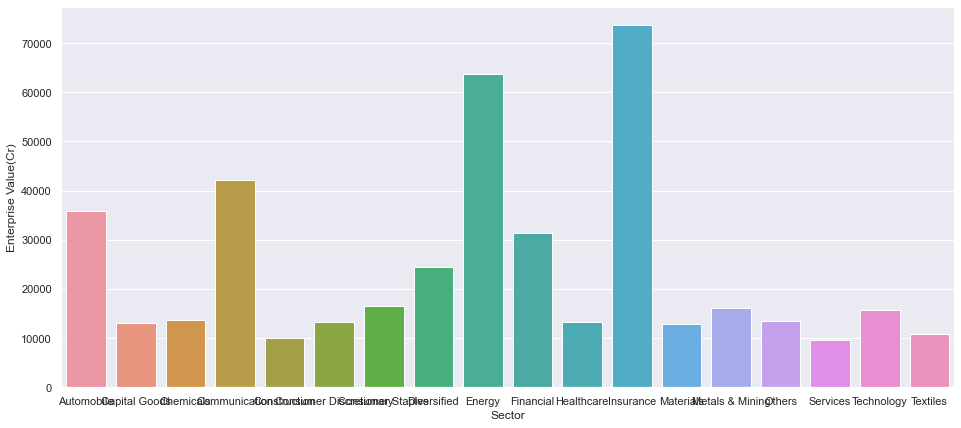

In [114]:
# Plotting Graph
plt.figure(figsize = (16,7))
sns.barplot(med['Sector'],med['Enterprise Value(Cr)'])

In [115]:
# Try to find a relation between Dividend Per Share with Market Cap(Cr)

Relation = df[['Dividend Per Share','Market Cap(Cr)']].corr()
Relation

,Dividend Per Share,Market Cap(Cr)
Dividend Per Share,1.000000,0.040371
Market Cap(Cr),0.040371,1.000000


In [116]:
# Count the companies in different Industry with positive and negative 3-Year Return.
# For instance how many companies in Drugs & Pharma industry have positive 3-Year Return and how many have that negative.
# Basis this, decide which industry would you recommend someone to invest if the same return is followed


CompanyCount = df.groupby('Industry',as_index=False)['3-Year Return'].value_counts()
CompanyCount

,Industry,3-Year Return,count
0,ACs & Refrigerators,-9.02,1
1,ACs & Refrigerators,-0.18,1
2,ACs & Refrigerators,40.77,1
3,ACs & Refrigerators,16.67,1
4,ACs & Refrigerators,16.27,1
...,...,...,...
446,Welding machinery,49.60,1
447,Wires & cables,60.58,1
448,Wires & cables,46.14,1
449,Wires & cables,8.22,1


In [117]:
#Then I also got the companies of different Industry which are performing positively and negatively in past 3_years

positive_3Years_retrn=df[df['3-Year Return']> 0].groupby(['Industry','3-Year Return','Company'],as_index = False)['Company'].sum()
positive_3Years_retrn

,Industry,3-Year Return,Company
0,ACs & Refrigerators,3.27,Whirlpool Of India Ltd.
1,ACs & Refrigerators,16.27,Blue Star Ltd.
2,ACs & Refrigerators,16.67,Voltas Ltd.
3,ACs & Refrigerators,40.77,Amber Enterprises India Ltd.
4,Abrasives,44.83,Carborundum Universal Ltd.
...,...,...,...
396,Welding machinery,49.60,Esab India Ltd.
397,Wires & cables,8.22,Finolex Cables Ltd.
398,Wires & cables,46.14,KEI Industries Ltd.
399,Wires & cables,60.58,Polycab India Ltd.


In [118]:
negative_3Years_retrn=df[df['3-Year Return']< 0].groupby(['Industry','3-Year Return','Company'],as_index = False)['Company'].sum()
negative_3Years_retrn

,Industry,3-Year Return,Company
0,ACs & Refrigerators,-9.02,Symphony Ltd.
1,ACs & Refrigerators,-0.18,Johnson Controls - Hitachi Air Conditioning In...
2,Air Transport,-29.76,SpiceJet Ltd.
3,Asset Management Companies,-8.04,HDFC Asset Management Company Ltd.
4,Auto Ancillaries,-4.05,Varroc Engineering Ltd.
5,Banking,-34.57,Yes Bank Ltd.
6,Banking,-27.45,RBL Bank Ltd.
7,Banking,-15.84,Punjab National Bank
8,Banking,-14.37,Bandhan Bank Ltd.
9,Banking,-8.55,Punjab & Sind Bank


In [126]:
# Come up with any one KPI which can help define the best stock across different Sector, 
# you may need to learn a little bit of Finance for the same
#ROCE
#Its an filter to measure compounded annual growth
#Its ROCE means Return on Capital Employed of 5 years = 15% to 20%

In [120]:
# Conclusion

# S0 there are 401 companies which have performed positively in different industries
# and 50 companies those are not performed well in various industries.....
#  and the relation between dividend_per_share and market_cap is that the large_cap companies are paying less dividend to
#  their shareHolder where are mid_cap companies are paying more means but large_cap investments are safest investment for investors
# and its unable to find 1 KPI which can suggest that it is a best stock....
# but (i) Roce of 5 years and market cap > 20,000 cr ......